In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

sns.set()

In [3]:
train_loss_dir = "plot_data/train_loss"
val_acc_dir = "plot_data/val_acc"
lbls = ["CCP200", "Italia_tel", "Shanghai_tel"]
data_size = np.array([4052, 4981, 4961])/128

In [7]:
y_ax_str = "accuracy"
ldir = val_acc_dir
lims = [0.9, 1.0]

In [5]:
y_ax_str = "BCE loss"
ldir = train_loss_dir
lims = [0.0, 0.25]

['ccp_200_gnn_pool_pointwise_2023-01-09_11-19-49_057495_logs_tb_version_0.json', 'italia_tel_ccp_200_gnn_pool_pointwise_2023-01-15_10-58-21_399618_logs_tb_version_0.json', 'shanghai_tel_ccp_200_gnn_pool_pointwise_2023-02-08_15-59-27_166847_logs_tb_version_0.json']
plot_data/val_acc/ccp_200_gnn_pool_pointwise_2023-01-09_11-19-49_057495_logs_tb_version_0.json
plot_data/val_acc/italia_tel_ccp_200_gnn_pool_pointwise_2023-01-15_10-58-21_399618_logs_tb_version_0.json
plot_data/val_acc/shanghai_tel_ccp_200_gnn_pool_pointwise_2023-02-08_15-59-27_166847_logs_tb_version_0.json


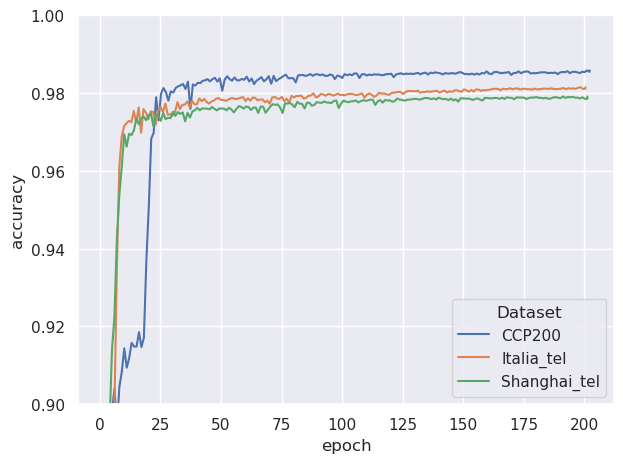

In [8]:
files = os.listdir(ldir)
files.sort()
print(files)

sns.set_theme(style="darkgrid")

for fname, ts_lbl, size in zip(files, lbls, data_size):
    pth = os.path.join(ldir, fname)
    print(pth)
    assert ts_lbl.lower()[:3] in pth.lower()
    ts = pd.read_json(pth).to_numpy()
    if ts.shape[-1] == 3:
        ts = ts[:, 1:]
    ts[:, 0] /= size
    ts_df = pd.DataFrame(ts, columns=["epoch", y_ax_str])
    sns.lineplot(data=ts_df, x="epoch", y=y_ax_str)

plt.ylim(*lims)
plt.legend(lbls, title="Dataset") #, fontsize='small', fancybox=True)

fig = plt.gcf()
fig.tight_layout()
fig.savefig(os.path.join(ldir, "plot.pdf"), format="pdf", bbox_inches='tight', pad_inches=0)
#plt.title("Validation accuracy during training of f_theta.")
